## Developing a 'radar wetlands insight tool'

Setup and imports - note dependencies on other DEA scripts

In [1]:
%matplotlib inline
import numpy as np
import datacube
import matplotlib.pyplot as plt
import radar_functions as rf
import radar_gmm as rg
import fiona
from datacube.utils import geometry
import rasterio.features

import xarray as xr

# Import external functions from dea-notebooks
import sys
sys.path.append('./10_Scripts/')
import DEAPlotting, TasseledCapTools, wetlands_insight

In [2]:
#setup radar dc
dc = datacube.Datacube(config='radar.conf')
#optical datacube - the radar one is separate and does not duplicate the Landsat archive
dcO = datacube.Datacube()

In [3]:
#define the time period
qtime = ('2016-09-01', '2019-06-01')

query = {
         'time': qtime,
         'lat' : (-32.53,-32.15),
         'long' : (142.16,142.70)
         }

In [4]:
#define the time period
qtime = ('2016-09-01', '2019-06-01')

query = {
         'time': qtime,
         'lat' : (-32.53,-32.15),
         'long' : (142.16,142.70)
         }

allSAR = rf.load_cleaned_SAR(query,dc)

## Gridded images

In [5]:
#dodgy monthly composites

from datacube.storage import masking

def wit_composite(coverclasses):
    return coverclasses.astype(float).mean(dim='time', skipna=True)

def SAR_composite(SAR_ds):
    return SAR_ds.mean(dim='time')
    

In [6]:
import gc
import imp
import radar_gmm as rg

In [7]:
imp.reload(rg)
imp.reload(wetlands_insight)

<module 'wetlands_insight' from './10_Scripts/wetlands_insight.py'>

Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Ski

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 2 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 4 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 1 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


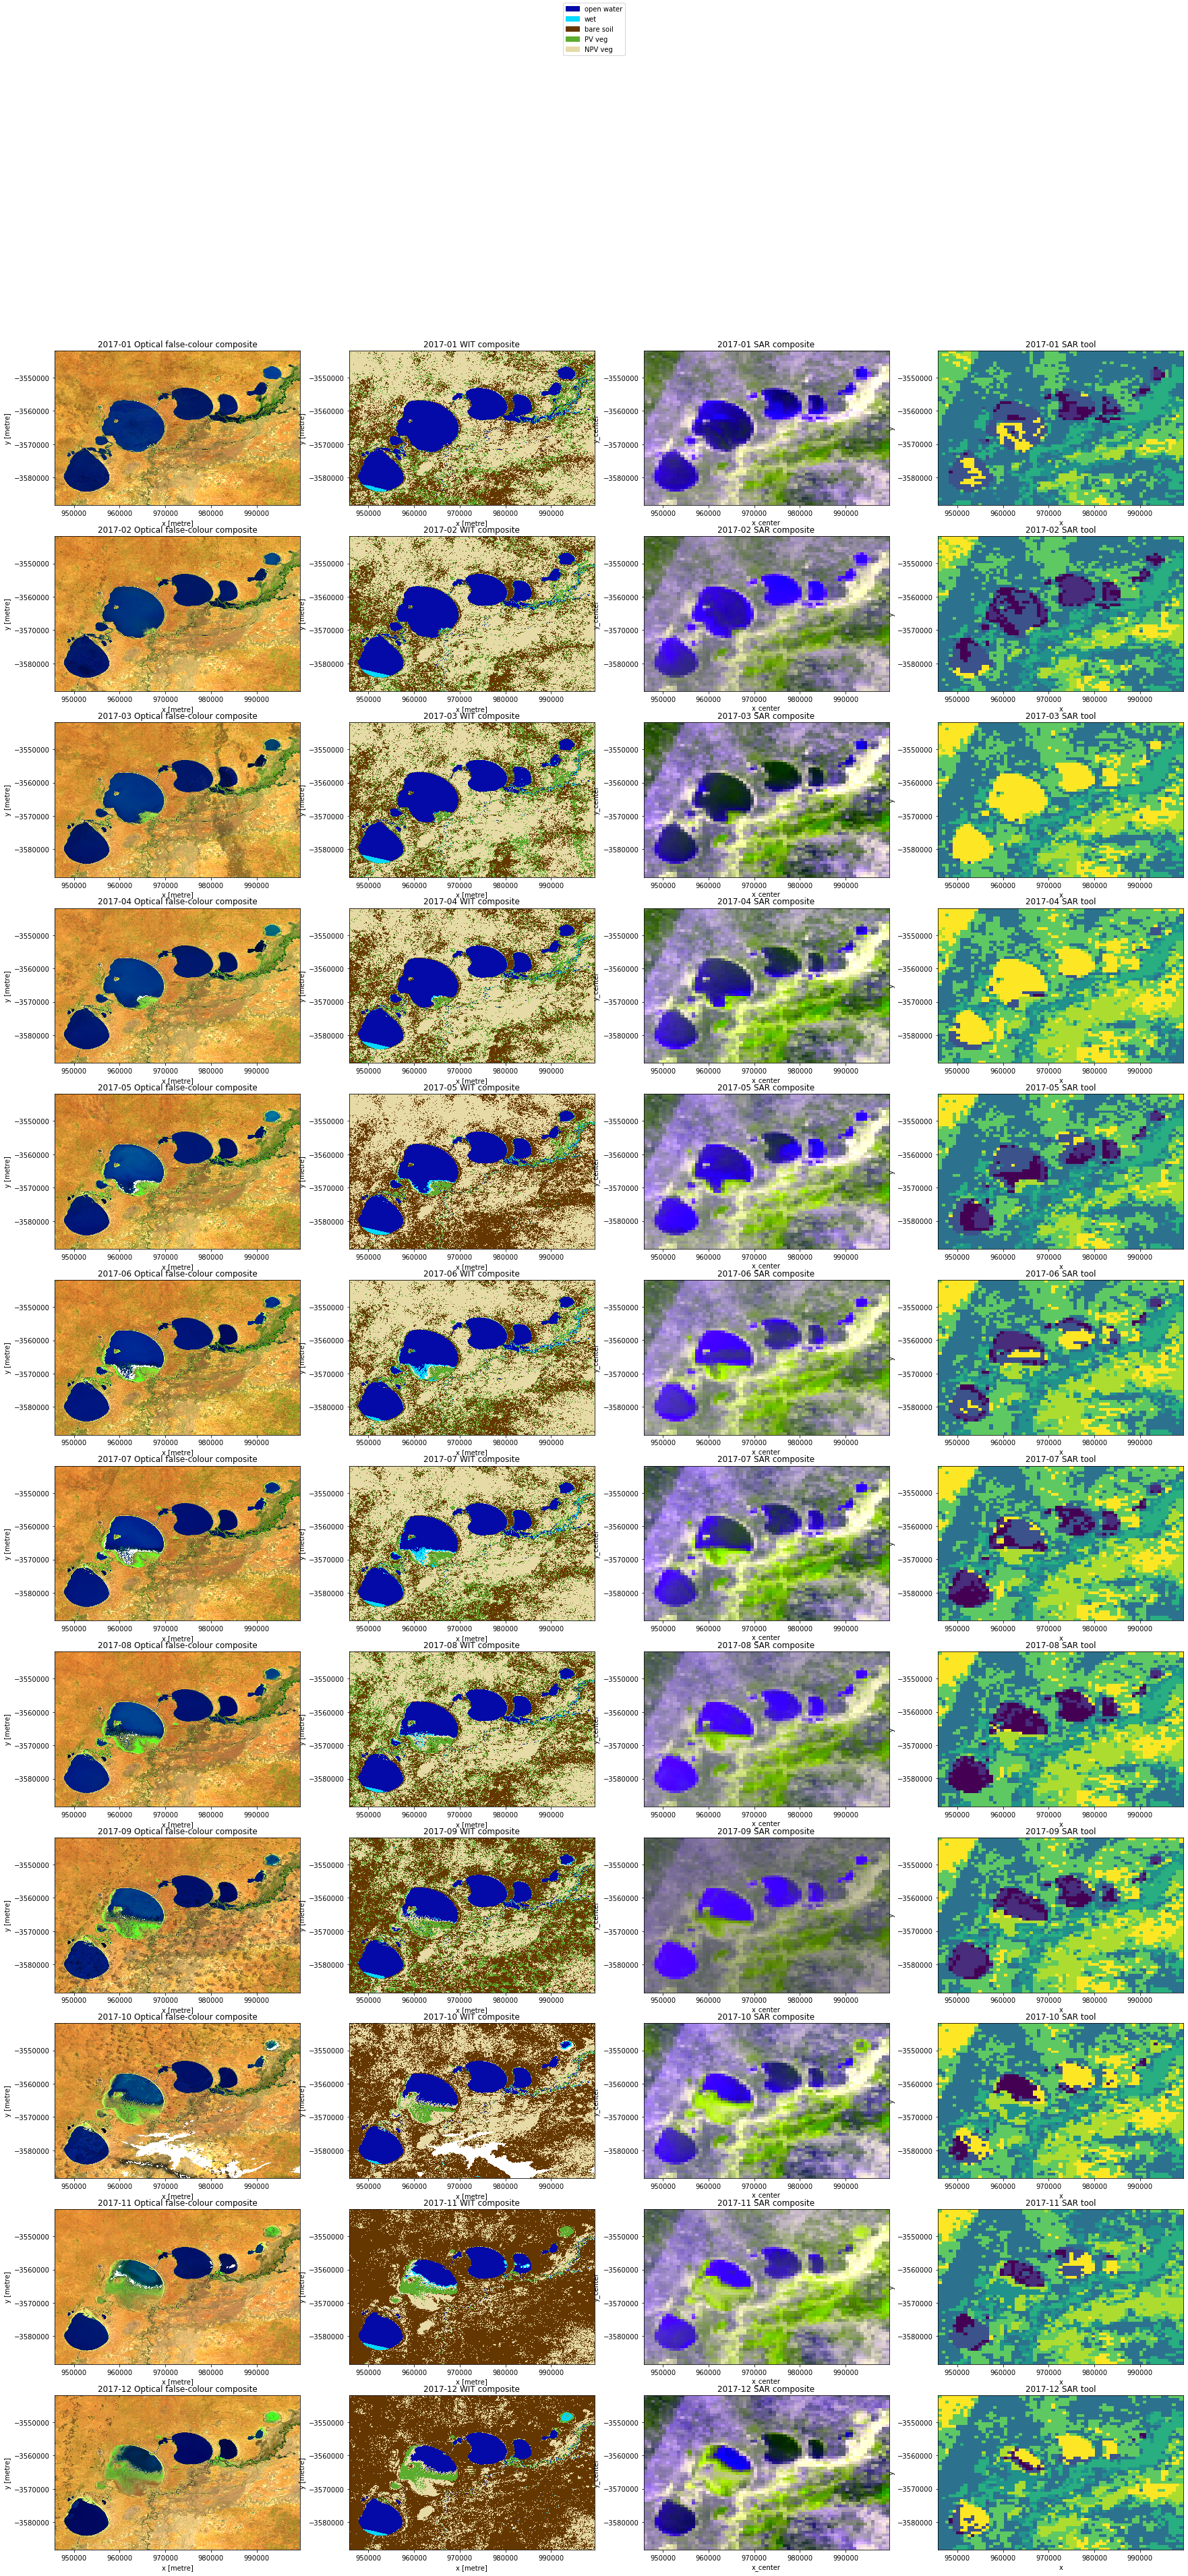

In [20]:
#make sure these values are correct if you want to study a different region
import seaborn as sns
lat = (-32.53,-32.15)
long = (142.16,142.70)


#set up color palettes
pal_opt = [sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["brown"],  
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"]]

pal_rad = [sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"], 
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
          ]


fig,ax = plt.subplots(12,4,figsize=(30,60))

import DEADataHandling

import fastmode
import wetlands_insight

imp.reload(fastmode)

for month in range(1,13):
    first = '2017-'+'{:02d}'.format(month)+'-01'
    last = str(2017+month//12)+'-'+'{:02d}'.format(month%12+1)+'-01'

    query = {
        'lat': lat,
        'long': long,
        'time': (first,last)
    }
    
    
    #get optical false colour for the month
    opt_month = DEADataHandling.load_clearlandsat(dcO, query)
    if len(opt_month.green)>0:
        opt_mean = opt_month.mean(dim='time')
        DEAPlotting.rgb(opt_mean,bands=['swir1','nir','green'],ax=ax[month-1,0],size=None,robust=True)
        ax[month-1,0].title.set_text(first[:-3]+' Optical false-colour composite')

    
    #get the optical WIT maps for the month
    coverclasses = wetlands_insight.WIT_da(query)
    
    if len(coverclasses)>0:
        comp = wit_composite(coverclasses)
        if comp is not None:
            comp.plot(ax=ax[month-1,1],vmin=0,vmax=4.01,levels=6,colors=pal_opt,label=None,add_colorbar=False)
            ax[month-1,1].title.set_text(first[:-3]+' WIT composite')
            
    #calls to gc and del help with avoiding OOM errors
    del(coverclasses)
    
    #use this if you want to go back to per-scene preprocessing
    #sar_ds = load_cleaned_SAR(query)
    
    bulksar_ds = downsampled.sel(time=slice(first,last))
    
    predicted_sar = all_out.sel(time=slice(first,last))
    
    #baresoil_subkmm(predicted_sar,bulksar_ds,subkmm,bare_class=0)
    
    monthly_classes = predicted_sar.reduce(fastmode.mode_class,dim='time',num_classes = 9)
    
    compSAR = SAR_composite(bulksar_ds)
    
    del(bulksar_ds)
    
    DEAPlotting.rgb(compSAR,bands=['vh','vv','vh_over_vv'],ax=ax[month-1,2],size=None,robust=True)
    ax[month-1,2].title.set_text(first[:-3]+' SAR composite')
    
    plt.sca(ax[month-1,3])
    
    monthly_classes.plot(add_colorbar=False,vmin=0,vmax=8.01,levels=10)
    ax[month-1,3].title.set_text(first[:-3]+' SAR tool')
    
    gc.collect()


from matplotlib.patches import Patch
labels = ['open water', 'wet','bare soil', 'PV veg', 'NPV veg']
leg_elements = [Patch(facecolor = pal_opt[i], edgecolor = pal_opt[i], label = labels[i]) for i in range(len(labels))]

fig.legend(handles = leg_elements, loc = 'upper center')

In [8]:
def bulknorm_SAR_ds(sar_ds):
    #normalise each scene between 0 and 1
    nscene = sar_ds.copy(deep=True)

    nscene['vv'] = (nscene['vv']-nscene['vv'].mean())/(2*nscene['vv'].std())
    nscene['vh'] = (nscene['vh']-nscene['vh'].mean())/(2*nscene['vh'].std())
    nscene['vh_over_vv'] = (nscene['vh_over_vv']-nscene['vh_over_vv'].mean())/(2*nscene['vh_over_vv'].std())
        
    return nscene


In [19]:
all_out.min()

<xarray.DataArray ()>
array(0.)

In [9]:
logSAR = np.log(allSAR)
bulknormSAR = bulknorm_SAR_ds(logSAR)

In [10]:
import gc
del(logSAR)
del(allSAR)
gc.collect()

1073

In [67]:
gc.collect()

1024

In [11]:
#spatially resample that shit
def downsample_ds(normlogSAR, downsample_factor = 5):
    downsampled = normlogSAR.groupby_bins('x',len(normlogSAR.x)/downsample_factor).mean(dim='x').groupby_bins('y',len(normlogSAR.y)/downsample_factor).mean(dim='y')
    downsampled = downsampled.rename({'x_bins':'x','y_bins':'y'})
    return downsampled

In [12]:
downsampled = downsample_ds(bulknormSAR,downsample_factor=32)

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [13]:
del(bulknormSAR)

In [9]:
kmm = rg.fit_kmeans(downsampled,n_components=4)
gmm = rg.fit_gmm(downsampled,n_components=4)

In [79]:
import imp
imp.reload(rg)

<module 'radar_gmm' from '/g/data1a/r78/rlt118/dea-notebooks/radar_gmm.py'>

In [15]:
btm = rg.fit_birch(downsampled,threshold=0.03)

In [120]:
import sklearn

In [82]:
%pdb off

Automatic pdb calling has been turned OFF


In [14]:
ktree = rg.SAR_Ktree(levels=2,branches=3)
ktree.fit(downsampled)

In [15]:
all_out = ktree.predict_dataset(downsampled)

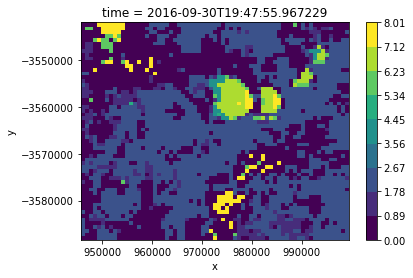

In [87]:
all_out.isel(time=2).plot(vmin=0,vmax=8.01,levels=10)

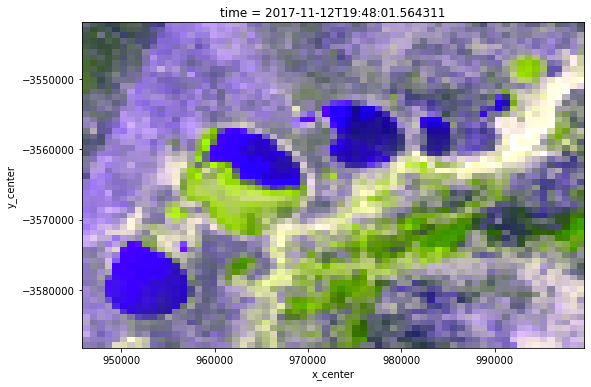

In [131]:
DEAPlotting.rgb(downsampled.isel(time=32),bands=['vh','vv','vh_over_vv'])

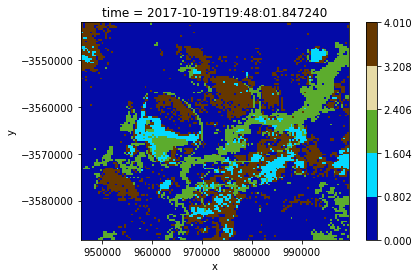

In [16]:
import seaborn as sns

pal_rad = [
       sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
    
       ]

rg.plot_gmm_classes(downsampled.isel(time=30),btm,vmin=0,vmax=4.01,levels=6,colors=pal_rad)

In [54]:
len(btm.subcluster_centers_)

942

In [15]:
kmm.cluster_centers_ = kmm.cluster_centers_[[1,0,2,3]]

In [ ]:
ind1 = 3
ind2 = 15
fig,ax=plt.subplots(4,2,figsize=(15,20))

class_ind1 = rg.calc_gmm_classes(bulknormSAR.isel(time=ind1),kmm)
class_ind2 = rg.calc_gmm_classes(bulknormSAR.isel(time=ind2),kmm)

scene1 = bulknormSAR.isel(time=ind1).where(class_ind1==1)
scene2 = bulknormSAR.isel(time=ind2).where(class_ind2==1)

DEAPlotting.rgb(scene1,bands=['vh','vv','vh_over_vv'],ax=ax[0,0],size=None,robust=True)
scene1.vv.plot(ax=ax[1,0],vmin=-2,vmax=2,add_colorbar=False)
scene1.vh.plot(ax=ax[2,0],vmin=-2,vmax=2,add_colorbar=False)
scene1.vh_over_vv.plot(ax=ax[3,0],vmin=-2,vmax=2,add_colorbar=False)

DEAPlotting.rgb(scene2,bands=['vh','vv','vh_over_vv'],ax=ax[0,1],size=None,robust=True)
scene2.vv.plot(ax=ax[1,1],vmin=-2,vmax=2,add_colorbar=False)
scene2.vh.plot(ax=ax[2,1],vmin=-2,vmax=2,add_colorbar=False)
scene2.vh_over_vv.plot(ax=ax[3,1],vmin=-2,vmax=2,add_colorbar=False)

It is clear that 'dry' areas are darker than 'wet' areas, but both are in class 1 according to the KMeans classifier. The following histograms suggest that thresholding on VV as a post-processing step on the KMeans predictions could be a promising improvement to the cover classifier

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(15,15))

scene1.vv.plot.hist(ax=ax[0,0],bins=30)
scene1.vh.plot.hist(ax=ax[1,0],bins=30)
scene1.vh_over_vv.plot.hist(ax=ax[2,0],bins=30)

scene2.vv.plot.hist(ax=ax[0,1],bins=30)
scene2.vh.plot.hist(ax=ax[1,1],bins=30)
scene2.vh_over_vv.plot.hist(ax=ax[2,1],bins=30)

In [22]:
def baresoil_postprocess(kmeans_classes, sar_scene, wet_class = 1, thresh=-0.25):
    """introduces a manually-thresholded 'bare soil' class. This code assumes
    that the 'wet' class from the classifier is 1, so make sure the classes are
    ordered correctly before applying this postprocessing step, or pass the actual
    bare soil class as a keyword argument. Acts in-place on the KMM class array
    """
    
    wetbare = (kmeans_classes == 1)
    dark = (sar_scene.vv < thresh)
    
    baresoil = np.logical_and(wetbare,dark)
    
    #paint the bare soil class
    np.place(kmeans_classes.data,baresoil.data,4)
    
def baresoil_subkmm(kmeans_classes, sar_scene, subkmm, wet_class = 1, bare_class = 1):
    """Applies a second K-means model based on the output of the first to differentiate
    bare soil and 'wet' (flooded) areas. Acts in place on the original KMM class predictions
    """
    
    wetbare = (kmeans_classes == 1)
    
    wetbare_da = sar_scene.where(kmeans_classes == 1)
    
    subclasses = rg.gmm_dataset(wetbare_da,subkmm)
    
    baresoil = np.logical_and(wetbare, subclasses==bare_class)
    
    #paint the bare soil class
    np.place(kmeans_classes.data,baresoil.data,4)

In [29]:
all_predictions = rg.gmm_dataset(downsampled,kmm)

In [18]:
subk_input = downsampled.where(all_predictions==1)

In [19]:
subkmm = rg.fit_kmeans(subk_input,n_components=2)

In [20]:
subkmm.cluster_centers_

array([[ 0.06739095, -0.08752721, -0.40167275],
       [-0.1349265 , -0.17398755, -0.15445063]])

In [30]:
baresoil_subkmm(all_predictions,downsampled,subkmm,bare_class=0)

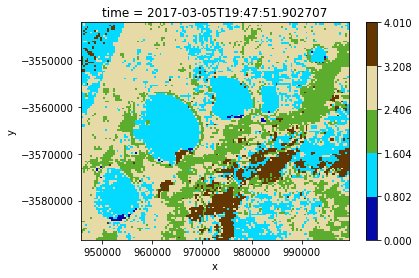

In [31]:
pal_rad = [
       sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
       ]

all_predictions.isel(time=15).plot(vmin=0,vmax=4.01,levels=6,colors=pal_rad)

## Making another stack plot with the new 'best model' (predicting on normalised downsampled and/or segmented data)

In [29]:
kmm.cluster_centers_ = kmm.cluster_centers_[[1,3,2,0]]

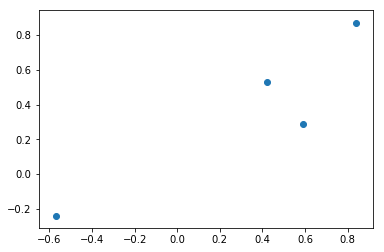

In [649]:
plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1])

Now let's make the stack plot and compare the SAR classes to the WIT ones over time.

In [326]:
#calc the timeseries with the new KMM clusters
pool = mp.Pool(mp.cpu_count())

index_stops = np.linspace(0,len(downsampled.time),num=mp.cpu_count()+1,dtype=int)

results = [pool.apply_async(rg.calc_gmm_timeseries,args=(downsampled,kmm),kwds={'tmin':index_stops[i],'tmax':index_stops[i+1]}) for i in range(len(index_stops) - 1)]

pool.close()
pool.join()

res_a = [r.get() for r in results]

t = xr.concat([res[0] for res in res_a],dim='time')
ts = np.concatenate(tuple(res[1] for res in res_a))

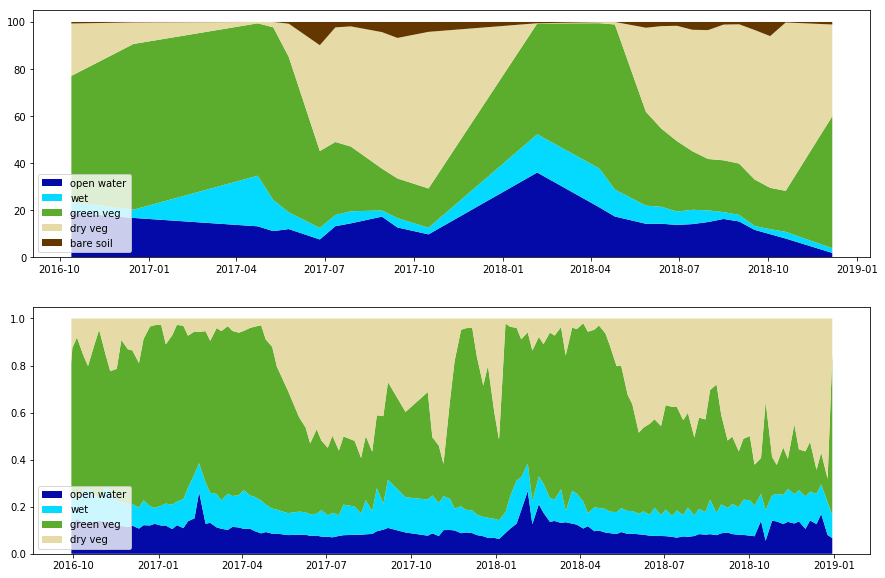

In [327]:
#the optical data covers a longer time period than the SAR so let's truncate it
wit_arr = wit_arr.sel(time=slice(t[0],t[-1]))

fig,ax = plt.subplots(2,1,figsize=(15,10))

#set up color palette
pal = [sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]]       

plt.sca(ax[0])
plt.stackplot(wit_arr.time.data,wit_arr.to_array().data,labels=['open water',
                      'wet',
                      'green veg',
                      'dry veg',
                      'bare soil',
                     ], colors=pal)

plt.legend(loc='lower left')

plt.sca(ax[1])
pal = [sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"]]
plt.stackplot(t.data,ts.transpose(),labels=['open water',
                      'wet',
                      'green veg',
                      'dry veg'
                     ], colors=pal)

plt.legend(loc='lower left')

In [632]:
perpix_ds = perpixnorm(logSAR)

In [633]:
perpix_ds.vh**2 + perpix_ds.vv**2 + perpix_ds.vh_over_vv**2

<xarray.DataArray (time: 131, y: 264, x: 488)>
array([[[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.]],

       [[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.]],

       ...,

       [[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.]],

       [[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.]]], dtype=float32)
Coordinates:
  * y        (y) float64 -1.34e+06 -1.34e+06 -1.34e+06 ... -1.334e+06 -1.334e+06
  * x        (x) float64 5.854e+04 5.856e+04 5.859e+04 ... 7.069e+04 7.071e+04
  * time     (time) datetime64[ns] 2016-09-28T20:47:53.975363 ... 2018-12-29T20:48:23.024455

## Debugging the dry season

In [666]:
query = {'lat': (-12.7, -12.64),
 'long': (132.53, 132.64),
 'time': ('2016-09-01', '2017-10-01')}

In [667]:
worst_sar_ds = load_cleaned_SAR(query)

In [668]:
badnorm = norm_SAR_ds(worst_sar_ds)

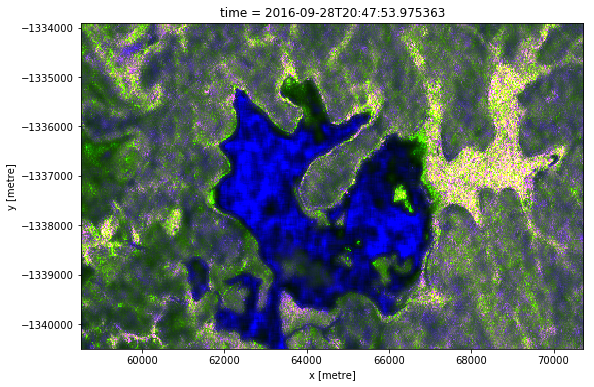

In [671]:
DEAPlotting.rgb(badnorm.isel(time=0),bands=['vh','vv','vh_over_vv'])

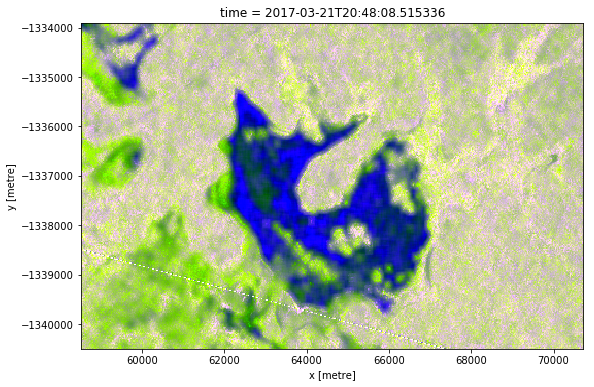

In [672]:
DEAPlotting.rgb(normlogSAR.isel(time=30),bands=['vh','vv','vh_over_vv'])